In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from artificial_satellites import Constellation, starlink_constellation

In [2]:
# Generate a Starlink-like satllite constellation. Set supersize=True to get a constellation 4x larger.
satellite_tles = starlink_constellation(supersize=False)
constellation = Constellation(satellite_tles)

In [3]:
# Propagate all the satellites to a given MJD (Oct 1, 2022)
mjd0 = 59853.5
constellation.update_mjd(mjd0)

In [4]:
# Return a numpy aray of the satellite properties. If eclip=True, the satellite is in Earth's shadow. 
# Satellites are always returned in the same order (so array index can serve as satellite ID)
sat_info = constellation.return_sat_info()
sat_info

array([(-0.39550215, 4.91989136,  True, 0.25729149,  0.36643858, 550737.4375 ),
       (-0.39542198, 5.27187967, False, 0.40444135,  0.66511476, 548909.9375 ),
       (-0.42904475, 5.61120176, False, 0.51240234,  0.96901048, 548969.4375 ),
       ...,
       (-0.68120182, 2.07559824, False, 4.47873828, -0.00737022, 331025.5    ),
       (-1.07799268, 1.2731806 , False, 4.64699147,  0.59874217, 323980.75   ),
       (-1.4612788 , 5.6861825 ,  True, 5.30183993,  0.6172083 , 325895.90625)],
      dtype=[('altitudes_rad', '<f8'), ('azimuth_rad', '<f8'), ('eclip', '?'), ('ras_rad', '<f8'), ('decs_rad', '<f8'), ('elevations', '<f8')])

Text(0, 0.5, 'Altitude (degrees)')

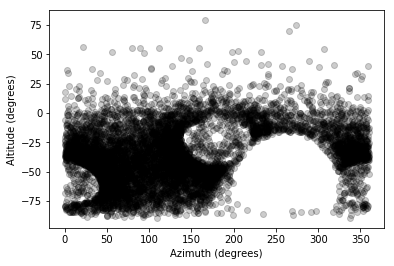

In [6]:
bright = np.where(sat_info['eclip'] == False)
plt.plot(np.degrees(sat_info['azimuth_rad'][bright]), np.degrees(sat_info['altitudes_rad'][bright]), 'ko', alpha=.2)
plt.xlabel('Azimuth (degrees)')
plt.ylabel('Altitude (degrees)')
# Big circle is the earth's shadow. Little circles are the poles where there is no constellation coverage.

In [7]:
# I put a method on there to check if a postion is satellite free over a time period. Not totally tested!
pointing_alt = 75 #60.
pointing_az = 160. #0.
mjd1 = mjd0 + 30./3600/24.

# Return 0 if no satellites, 1 if a track intercepts the circle. Assuming no major change in alt,az due to tracking.
constellation.check_times(pointing_alt, pointing_az, mjd0, mjd1)

/Users/yoachim/git_repos/sats_for_z/artificial_satellites.py:151: RuntimeWarning: invalid value encountered in sqrt
  sqrt_disc = np.sqrt(disc)
/Users/yoachim/git_repos/sats_for_z/artificial_satellites.py:155: RuntimeWarning: invalid value encountered in less
  outside = np.where(((t1 < 0) | (t1 > 1)) & ((t2 < 0) | (t2 > 1)))
/Users/yoachim/git_repos/sats_for_z/artificial_satellites.py:155: RuntimeWarning: invalid value encountered in greater
  outside = np.where(((t1 < 0) | (t1 > 1)) & ((t2 < 0) | (t2 > 1)))


1